# $OpenCV 시작하기$

- OpenCV에서 이미지를 구성하는 요소   


    1. 이미지 크기
    2. 정밀도
    3. 채널
    + 관심 영역
    + 관심 채널

 - 위 3가지의 요소가 모두 일치해야 이미지끼리 연산이 가능.   
 - 프로그램이 요구하는 데이터를 효율적으로 처리하려면 구성 요소를 변경하거나 관심이 있는 부분을 선택해서 활용.   
 - 구성 요소를 변경하거나 필요한 부분을 잘라서 사용하면 연산량을 줄이고 정확도를 향상 시킬 수 있다.

## 1. 이미지 크기

- 이미지 크기는 필드나 변수에 할당될 이미지의 너비(width)와 높이(height)를 의미   
- 이미지는 행렬(matrix)의 형태로 구성돼 있으며, 이미지의 크기는 데이터의 크기라 볼 수 있다.

#### Q. 데이터의 크기를 줄이는 방법은?

### 이미지 크기 속성

- openCV에서 변수나 필드에서 이미 설정된 이미지의 크기로 다른 이미지를 불러올 경우 오류가 나곤 한다.   
- 이는 이미지 크기 속성 값이 "액자 역할" 을 하기 때문이다.   
- 액자에 이미지를 담기 위해선 원본 이미지의 크기를 변경하는 함수를 적용한 다음 변수나 필드로 불러와 사용

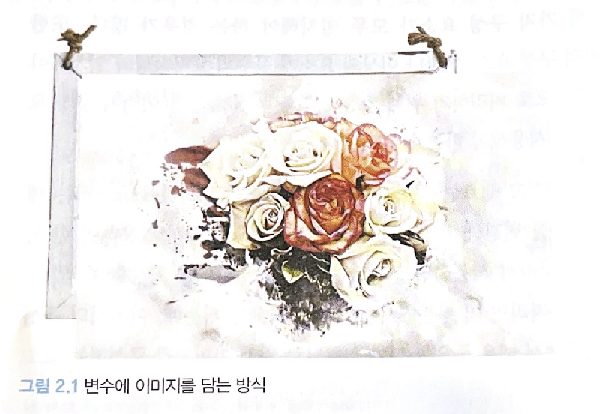

#### 위 그림을 회전하면?

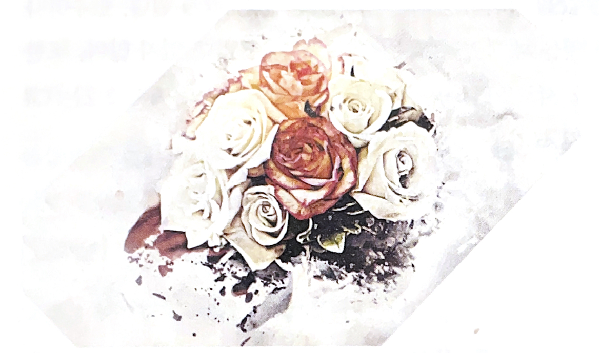

### OpenCV에서 이미지의 크기를 표현하는 방법

- 너비(width)와 높이(height)로 표시하거나 행(row)과 열(column)로 표현
- 너비는 열과 같은 값
- 높이는 행과 같은 값

In [7]:
import numpy as np

width, height = 640, 480
rows, cols = 480, 640

color = np.zeros((height, width, 3), np.uint8)
gray = np.zeros((rows, cols, 1), np.uint8)

In [9]:
color.shape, gray.shape

((480, 640, 3), (480, 640, 1))

## 2. 정밀도(Bit Depth)

- 정밀도란 이미지가 얼마나 많은 색상을 표현할 수 있느냐를 의미   
- 정밀도가 높을수록 많은 색상을 표현할 수 있어 데이터의 폭이 넓어지고 이미지가 더 자연스러워진다.
- 그렇지만, 정밀도가 높다고 해서 정확도가 높아지진 않으며, 오히려 더 많은 데이터로 인해 정확도가 떨어질 수도 있다.

### 비트 표현

- 비트 : 색상의 표현 개수를 설정
- 표현 : nBit, nBit의 의미는 $2^n$ 이므로, 4bit는 $2^4$인, 16가지 색상 표현이 가능하다.   

- 색상을 표현할 때는 적어도 8비트여야 유의미한 데이터를 얻게 되어 색상 표현이 가능
- 8비트 정밀도를 사용할 때 흑백 색상(Grayscale)을 원할하게 표현 가능

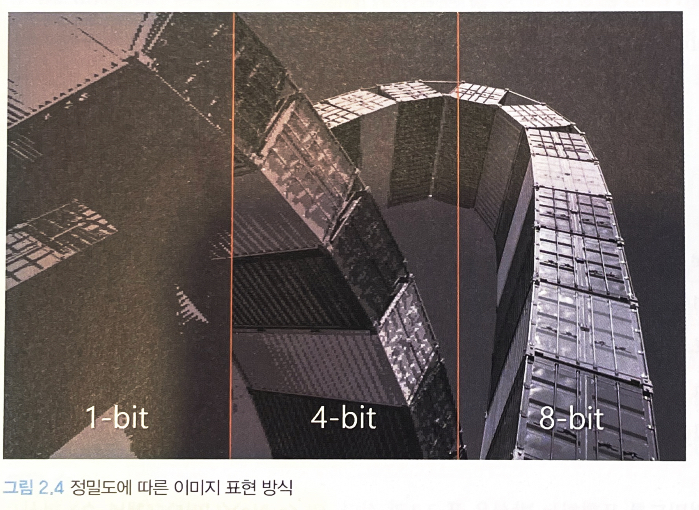

### OpenCV 정밀도 표현법

- OpenCV에서는 8비트 정밀도 이미지를 표현할 때 U8(Unsigned 8-bit integers)의 정밀도 값을 가장 많이 활용
- unsigned는 부호 없음.
- integers는 정수형

- 부호가 사라지면 0~255의 범위
- 부호가 있는 경우 signed(S)를 사용하며, -127~127의 범위

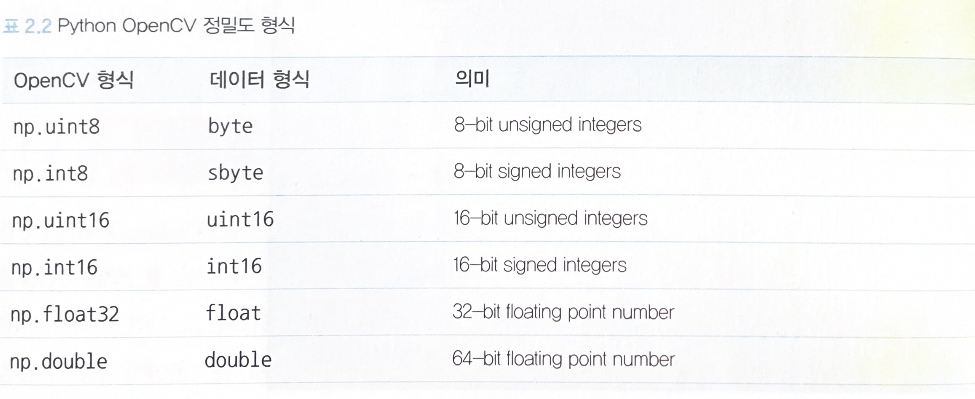

In [2]:
# Python OpenCV에서의 정밀도 표현

color = np.zeros((height, width, 3), np.uint8)
gray = np.zeros((rows, cols, 1), np.uint8)

- 색상 이미지와 흑백 이미지의 차이점은 채널 수가 다르다.

## 3. 채널

- 채널 : 그래픽스 이미지의 색상 정보 를 갖고 있다.
- 7개의 채널 (RGB + Alpha + Hue, saturation, value..)

- 색상을 표시할 때는 주로 3~4채널의 값을 사용
- 흑백을 표시할 때는 1채널을 사용

### 색상 표현

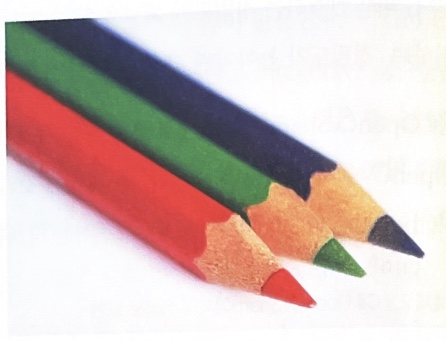

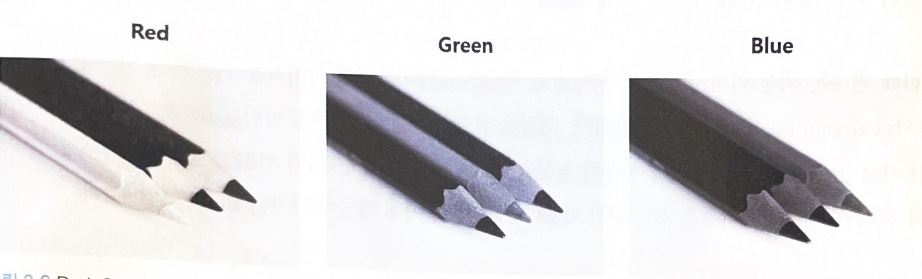

- 해당 성분에 가까울수록 흰색(255에 가깝게)으로 출력되고 가깝지 않을수록 검은색(0에 가깝게) 출력이 된다.
- 아무리 색상이 파란색이라도 약간의 빨간색, 초록색이 포함됨

#### 단일 채널을 사용하는 이유

- 1채널로 밝기만 표현해줘도 된다. 그 외에 더 ++ 하게 되면 동일한 값이 3번 반복되며 쓸데없이 연산량을 늘리게 된다

## 4. 관심 영역(ROI: Region Of Interest)

- 1920x1280 비율의 색상 이미지(3채널)를 처리하면 7,372,800개의 데이터 공간이 생성
- 하나의 공간 안에 할당할 수 있는 데이터의 가짓수는 256개
- 그렇기 때문에 관심 영역을 사용해 불필요한 데이터의 양을 줄인다.

- 관심 영역: 이미지상에서 관심 있는 영역

- 이미지를 처리할 때, 객체를 탐지하거나 검출하는 영역을 명확하게 관심 영역이라 지정할 수 있다. (ex)바운딩 박스)
- 관심 영역을 지정해 프로세스를 구성하면 알고리즘의 정확도와 연산 속도를 높일 수 있다.

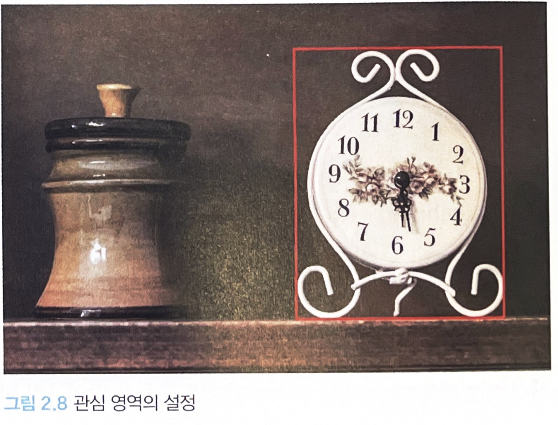

## 5. 관심 채널(COI: Channel Of Interest)

- 관심 채널: 이미지상에서 관심 있는 채널

- 색상 이미지에는 매우 많은 데이터가 담겨 있다.
- 채널을 분리해서 특정 채널에 대해 연산을 수행하면 데이터의 양이 1/3로 줄어든다.
- 색상 요소가 중요하지 않은 알고리즘의 경우 각 채널에 대한 연산이 더 높은 정확도를 보일 수도 있다.

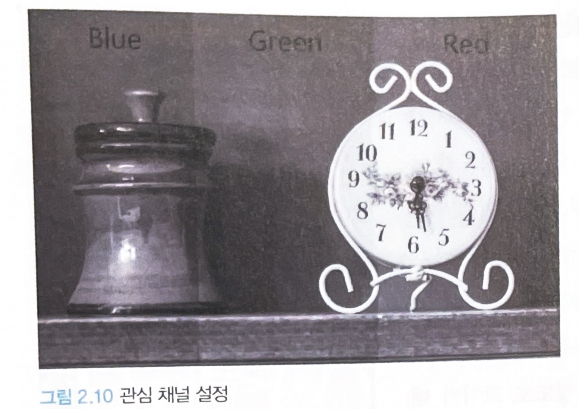

## 6. 히스토그램

- 히스토그램: 도수 분포표 중 하나로 데이터의 분포를 몇 개의 구간으로 나누고 각 구간에 속하는 데이터를 시각적으로 표현한 막대그래프
- X 축을 픽셀의 값, Y 축을 해당 픽셀의 개수로 표현

- 히스토그램의 중요 요소 3가지

    1. 빈도수(BINS): 히스토그램 그래프의 X 축 간격
    2. 차원 수(DIMS): 히스토그램을 분석할 이미지의 차원
    3. 범위(RANGE): 히스토그램 그래프의 X 축 범위

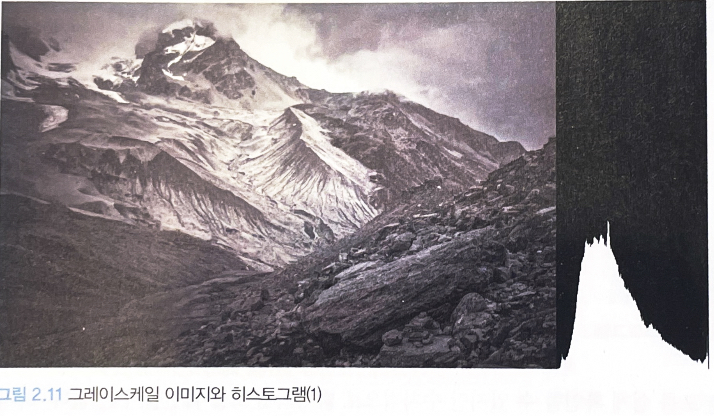

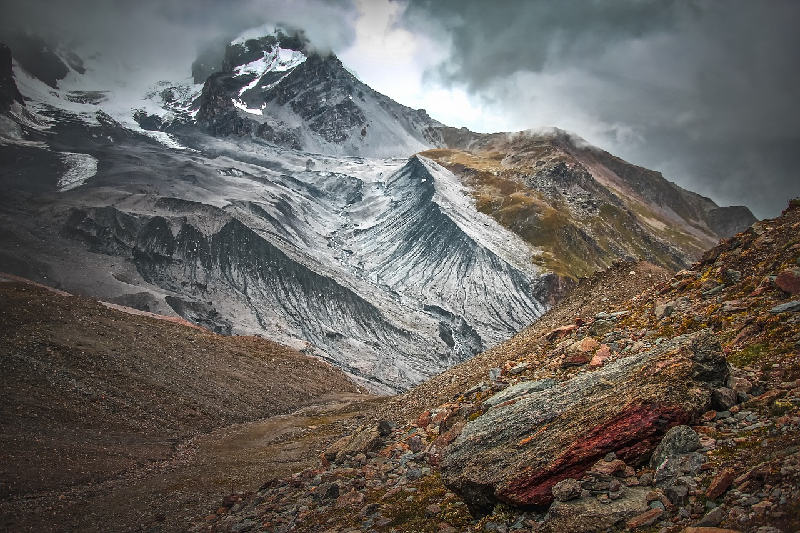

In [11]:
# Python OpenCV에서의 히스토그램 예시

import cv2
import numpy as np

image = cv2.imread("image.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
result = np.zeros((image.shape[0], 256), dtype=np.uint8)

hist = cv2.calcHist([image], [0], None, [256], [0, 256])
cv2.normalize(hist, hist, 0, 255, cv2.NORM_MINMAX)

for x, y in enumerate(hist):
    cv2.line(result, (int(x), image.shape[0]), (int(x), image.shape[0] - int(y)), 255)

dst = np.hstack([image[:, :, 0], result])
cv2.imshow("dst", dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# Python OpenCV에서의 히스토그램 계산 함수

hist = cv2.calcHist(
    images,  # 입력 이미지
    channels,  # 특정 채널
    mask,  # 이미지를 분석할 영역
    histSize,  # 빈도수 설정
    ranges,  # 범위 설정
    hist = None,
    accumulate = False  # 히스토그램이 누적해 반영할 지 설정
)